In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import math
import scipy.stats as stats
from scipy.stats import skew, kurtosis
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import roc_curve, auc

In [2]:
data = pd.read_csv("C:\\Users\\Mandoo\\Desktop\\EEG_data.csv")
df = pd.read_csv("C:\\Users\\Mandoo\\Desktop\\demographic_info.csv")

In [3]:
df

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M
5,5,24,Han Chinese,M
6,6,24,Han Chinese,M
7,7,25,Han Chinese,M
8,8,25,Han Chinese,M
9,9,24,Han Chinese,F


In [4]:
data

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9.0,9.0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,1.0,0.0
12807,9.0,9.0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,1.0,0.0
12808,9.0,9.0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,1.0,0.0
12809,9.0,9.0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,1.0,0.0


In [5]:
df.rename(columns={'subject ID':'SubjectID'},inplace=True)

In [6]:
df = df.merge(data,on='SubjectID')

In [7]:
df

,SubjectID,age,ethnicity,gender,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0,25,Han Chinese,M,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0,25,Han Chinese,M,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0,25,Han Chinese,M,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0,25,Han Chinese,M,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0,25,Han Chinese,M,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9,24,Han Chinese,F,9.0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,1.0,0.0
12807,9,24,Han Chinese,F,9.0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,1.0,0.0
12808,9,24,Han Chinese,F,9.0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,1.0,0.0
12809,9,24,Han Chinese,F,9.0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,1.0,0.0


In [8]:
df.head()

,SubjectID,age,ethnicity,gender,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0,25,Han Chinese,M,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0,25,Han Chinese,M,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0,25,Han Chinese,M,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0,25,Han Chinese,M,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0,25,Han Chinese,M,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [9]:
df.tail()

,SubjectID,age,ethnicity,gender,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
12806,9,24,Han Chinese,F,9.0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,1.0,0.0
12807,9,24,Han Chinese,F,9.0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,1.0,0.0
12808,9,24,Han Chinese,F,9.0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,1.0,0.0
12809,9,24,Han Chinese,F,9.0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,1.0,0.0
12810,9,24,Han Chinese,F,9.0,64.0,29.0,-49.0,1164555.0,1184366.0,50014.0,124208.0,10634.0,445383.0,22133.0,4482.0,1.0,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12811 entries, 0 to 12810
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  int64  
 1    age                12811 non-null  int64  
 2    ethnicity          12811 non-null  object 
 3    gender             12811 non-null  object 
 4   VideoID             12811 non-null  float64
 5   Attention           12811 non-null  float64
 6   Mediation           12811 non-null  float64
 7   Raw                 12811 non-null  float64
 8   Delta               12811 non-null  float64
 9   Theta               12811 non-null  float64
 10  Alpha1              12811 non-null  float64
 11  Alpha2              12811 non-null  float64
 12  Beta1               12811 non-null  float64
 13  Beta2               12811 non-null  float64
 14  Gamma1              12811 non-null  float64
 15  Gamma2              12811 non-null  float64
 16  pred

In [11]:
df.shape

(12811, 18)

In [12]:
df.describe()

,SubjectID,age,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
count,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,12811.000000,12811.000000
mean,4.487394,25.409960,4.390602,41.313871,47.182656,65.570760,6.057853e+05,1.680526e+05,4.138435e+04,3.318339e+04,2.431837e+04,3.814433e+04,2.959255e+04,1.441597e+04,0.479978,0.512606
std,2.865373,2.205148,2.913232,23.152953,22.655976,597.921035,6.376236e+05,2.441346e+05,7.243082e+04,5.831410e+04,3.837968e+04,7.906606e+04,7.982637e+04,3.603523e+04,0.499618,0.499861
min,0.000000,24.000000,0.000000,0.000000,0.000000,-2048.000000,4.480000e+02,1.700000e+01,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000,0.000000
25%,2.000000,24.000000,2.000000,27.000000,37.000000,-14.000000,9.806400e+04,2.691750e+04,6.838000e+03,6.852000e+03,6.140000e+03,7.358500e+03,4.058000e+03,2.167500e+03,0.000000,0.000000
50%,4.000000,25.000000,4.000000,43.000000,51.000000,35.000000,3.954870e+05,8.133100e+04,1.750000e+04,1.495900e+04,1.281800e+04,1.581000e+04,9.763000e+03,5.116000e+03,0.000000,1.000000
75%,7.000000,25.000000,7.000000,57.000000,63.000000,90.000000,9.166230e+05,2.052760e+05,4.477950e+04,3.455050e+04,2.740600e+04,3.549400e+04,2.488800e+04,1.266950e+04,1.000000,1.000000
max,9.000000,31.000000,9.000000,100.000000,100.000000,2047.000000,3.964663e+06,3.007802e+06,1.369955e+06,1.016913e+06,1.067778e+06,1.645369e+06,1.972506e+06,1.348117e+06,1.000000,1.000000


In [13]:
df.isnull().sum()

SubjectID             0
 age                  0
 ethnicity            0
 gender               0
VideoID               0
Attention             0
Mediation             0
Raw                   0
Delta                 0
Theta                 0
Alpha1                0
Alpha2                0
Beta1                 0
Beta2                 0
Gamma1                0
Gamma2                0
predefinedlabel       0
user-definedlabeln    0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
pd.DataFrame(df.dtypes).T

,SubjectID,age,ethnicity,gender,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,int64,int64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [16]:
df = df.rename(columns={' age':'Age',' ethnicity':'Ethnicity',' gender':'Gender','user-definedlabeln':'Label'})

In [17]:
pd.DataFrame(df.columns.tolist())

,0
0,SubjectID
1,Age
2,Ethnicity
3,Gender
4,VideoID
5,Attention
6,Mediation
7,Raw
8,Delta
9,Theta


In [18]:
#df=df.drop(['SubjectID','VideoID','predefinedlabel','Ethnicity'],axis=1)

In [19]:
cols_to_change = ["Gender"] 
cols_to_change 
df[cols_to_change] = df[cols_to_change].astype("category") 
pd.DataFrame(df.dtypes).T

,SubjectID,Age,Ethnicity,Gender,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,Label
0,int64,int64,object,category,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [20]:
pd.DataFrame(df.columns.tolist())

,0
0,SubjectID
1,Age
2,Ethnicity
3,Gender
4,VideoID
5,Attention
6,Mediation
7,Raw
8,Delta
9,Theta


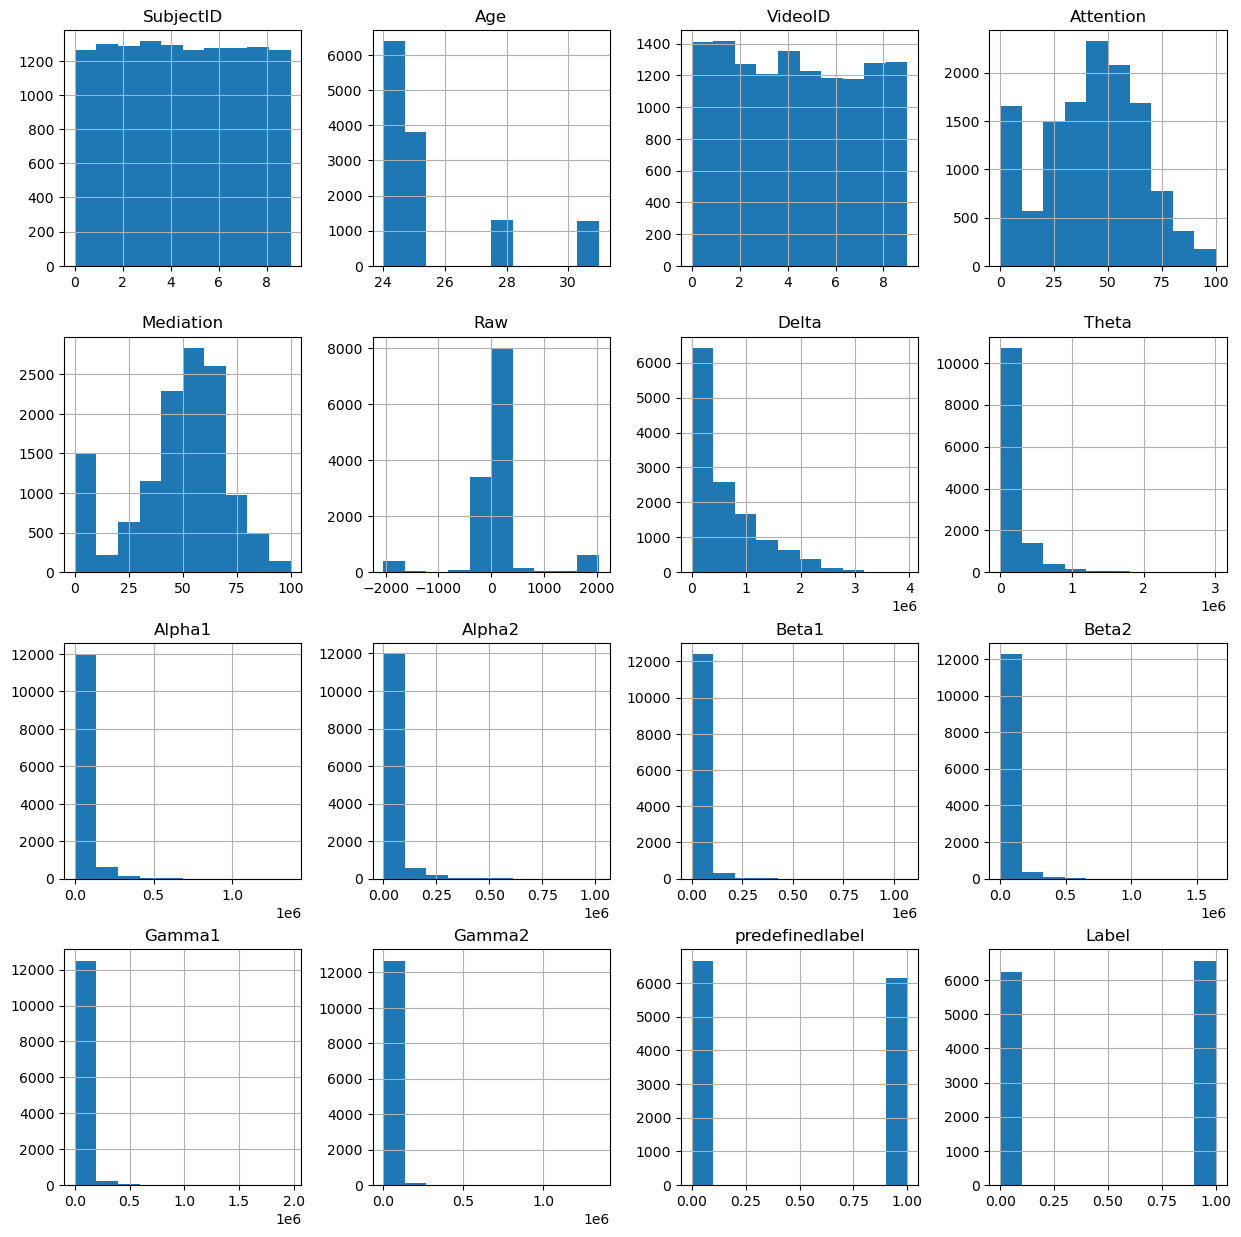

In [21]:
df.hist(figsize = (15,15))
plt.show()

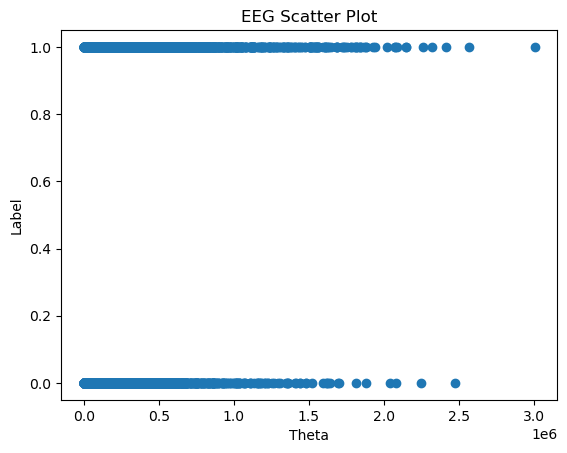

In [22]:
plt.scatter(df.Theta, df.Label)
plt.xlabel('Theta')
plt.ylabel('Label')
plt.title('EEG Scatter Plot')
plt.show()

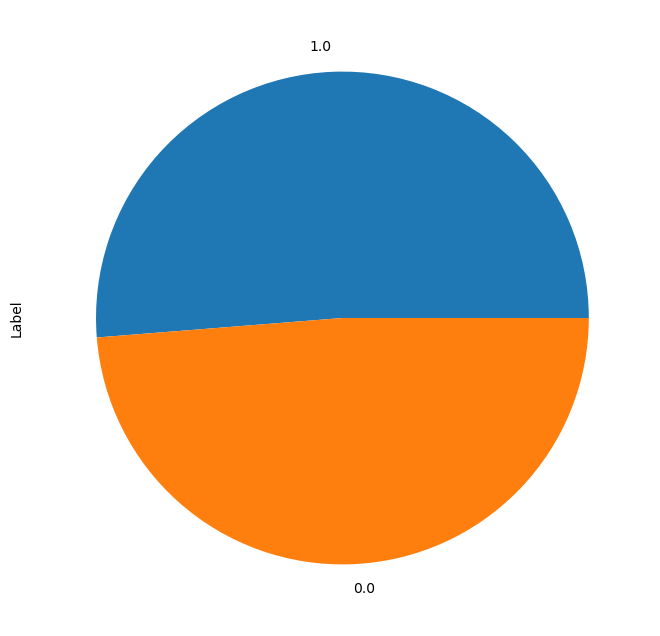

In [23]:
plt.figure(figsize=(8,8))
df['Label'].value_counts().plot(kind='pie')
plt.show()

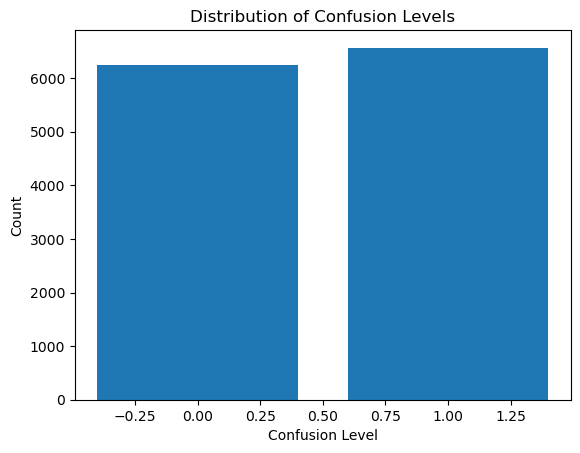

In [24]:
# Count the occurrences of each label
label_counts = df['Label'].value_counts()

# Plotting the bar plot
plt.bar(label_counts.index, label_counts.values)

# Adding labels and title
plt.xlabel('Confusion Level')
plt.ylabel('Count')
plt.title('Distribution of Confusion Levels')

# Show the plot
plt.show()

In [25]:
df['Gender'].unique()

['M', 'F']
Categories (2, object): ['F', 'M']

In [26]:
Categorical_features=['Age','Gender','Bengali','English','Han Chinese']
Continous_features=['Attention','Mediation','Raw','Delta','Theta','Alpha1','Alpha2','Beta1','Beta2','Gamma1','Gamma2']
print('Categorical_features:',len(Categorical_features))
print('Continous_features:',len(Continous_features))

Categorical_features: 5
Continous_features: 11


In [27]:
# Calculate Skewness
selected_columns = ["VideoID","Attention","Mediation","Raw","Delta","Theta","Alpha1","Alpha2","Beta1","Beta2","Gamma1","Gamma2","predefinedlabel","Label"]
skewness = df[selected_columns].apply(skew)
print("Skewness:")
skewness

Skewness:


VideoID             0.051779
Attention          -0.168836
Mediation          -0.679784
Raw                 0.269580
Delta               1.395440
Theta               3.468528
Alpha1              5.556880
Alpha2              5.718375
Beta1               6.900657
Beta2               7.331578
Gamma1             10.895879
Gamma2             12.558163
predefinedlabel     0.080152
Label              -0.050441
dtype: float64

In [28]:
# Calculate Kurtosis
kurt = df[selected_columns].apply(kurtosis)
print("Kurtosis:")
kurt

Kurtosis:


VideoID             -1.248520
Attention           -0.527544
Mediation           -0.024218
Raw                  7.656546
Delta                1.844819
Theta               17.134604
Alpha1              51.775226
Alpha2              50.335416
Beta1               97.014155
Beta2               84.365391
Gamma1             181.810007
Gamma2             291.049158
predefinedlabel     -1.993576
Label               -1.997456
dtype: float64

In [29]:
#The chi-square test will help determine whether there is a significant association between confusion levels and gender.
# Create a contingency table
contingency_table = pd.crosstab(df['Label'], df['Gender'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
 print("There is a significant association between confusion levels and gender.")
else:
 print("There is no significant association between confusion levels and gender.")

Contingency Table:
Gender     F     M
Label             
0.0     1297  4947
1.0     1278  5289

Chi-Square Test Results:
Chi-Square Statistic: 3.3442503968798323
P-value: 0.06744018954096336
There is no significant association between confusion levels and gender.


In [30]:
# Assuming 'Label' is the numeric variable of interest and 'Gender' is the binary categorical variable
group1 = df[df['Gender'] == 'Male']['Label']
group2 = df[df['Gender'] == 'Female']['Label']

# Perform Z-test
t_statistic, p_value = ttest_ind(group1, group2, equal_var=False)

# Display the results
print("Z-Test Results:")
print(f"T-Statistic: {t_statistic}")
print(f"P-value: {p_value}")

Z-Test Results:
T-Statistic: nan
P-value: nan


In [31]:
# Perform t-test
t_statistic, p_value = ttest_ind(group1, group2)

# Display the results
print("Two-Sample T-Test Results:")
print(f"T-Statistic: {t_statistic}")
print(f"P-value: {p_value}")

Two-Sample T-Test Results:
T-Statistic: nan
P-value: nan


In [32]:
# Assuming 'Label' is the numeric variable of interest and 'Ethnicity' is a categorical variable with multiple groups
ethnicity_groups = [df[df['Ethnicity'] == ethnicity]['Label'] for ethnicity in df['Ethnicity'].unique()]

# Perform ANOVA
f_statistic, p_value = f_oneway(*ethnicity_groups)

# Display the results
print("ANOVA Results:")
print(f"F-Statistic: {f_statistic}")
print(f"P-value: {p_value}")

ANOVA Results:
F-Statistic: 15.004041446702113
P-value: 3.100624093578436e-07


In [33]:
numeric_columns = df.select_dtypes(include='number')
selected_columns = df[numeric_columns.columns]
# Calculate the covariance matrix
covariance_matrix = selected_columns.cov()

# Display the covariance matrix
print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
                     SubjectID            Age       VideoID     Attention  \
SubjectID             8.210360      -2.195456     -0.045349 -1.197079e+01   
Age                  -2.195456       4.862677      0.039856  1.110293e+01   
VideoID              -0.045349       0.039856      8.486919 -2.915270e+00   
Attention           -11.970789      11.102931     -2.915270  5.360592e+02   
Mediation           -11.084192       9.704582      0.480874  2.877729e+02   
Raw                  46.620076     -44.191384     12.458073 -1.314213e+03   
Delta            370743.881247 -298831.060546  18227.262554 -3.253773e+06   
Theta             84361.185665  -79656.120963   -463.420063 -1.460341e+06   
Alpha1            24268.000283  -19320.615889   2867.683873 -3.331528e+05   
Alpha2            25739.860968  -18677.097422  -1714.368810 -3.335003e+05   
Beta1             10869.362849  -12560.308656    849.008636 -2.269148e+05   
Beta2             34007.695460  -28842.333219 -17073.6457

In [34]:
# Calculate the correlation matrix
scores = df[['Alpha1', 'Beta1', 'Gamma1']]
correlation_matrix = scores.corr()
correlation_matrix

,Alpha1,Beta1,Gamma1
Alpha1,1.000000,0.549113,0.267677
Beta1,0.549113,1.000000,0.422165
Gamma1,0.267677,0.422165,1.000000


In [35]:
# Calculate the correlation matrix
scores = df[['Alpha2', 'Beta2', 'Gamma2']]
correlation_matrix = scores.corr()
correlation_matrix

,Alpha2,Beta2,Gamma2
Alpha2,1.000000,0.464840,0.455567
Beta2,0.464840,1.000000,0.692584
Gamma2,0.455567,0.692584,1.000000


In [36]:
# Calculate the correlation matrix
scores = df[['Raw','Delta','Theta']]
correlation_matrix = scores.corr()
correlation_matrix

,Raw,Delta,Theta
Raw,1.000000,0.048908,0.053443
Delta,0.048908,1.000000,0.483386
Theta,0.053443,0.483386,1.000000


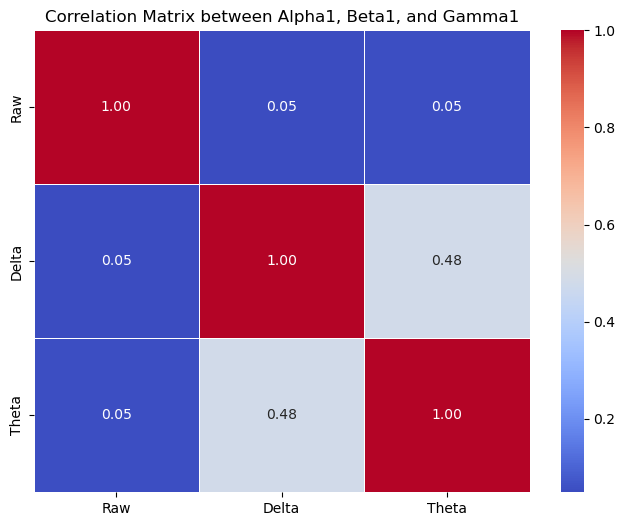

In [37]:
# Plot the heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix between Alpha1, Beta1, and Gamma1')
plt.show()

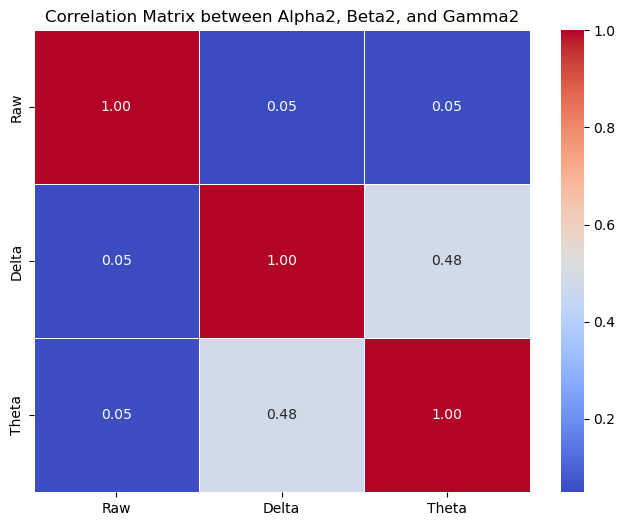

In [38]:
# Plot the heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix between Alpha2, Beta2, and Gamma2')
plt.show()

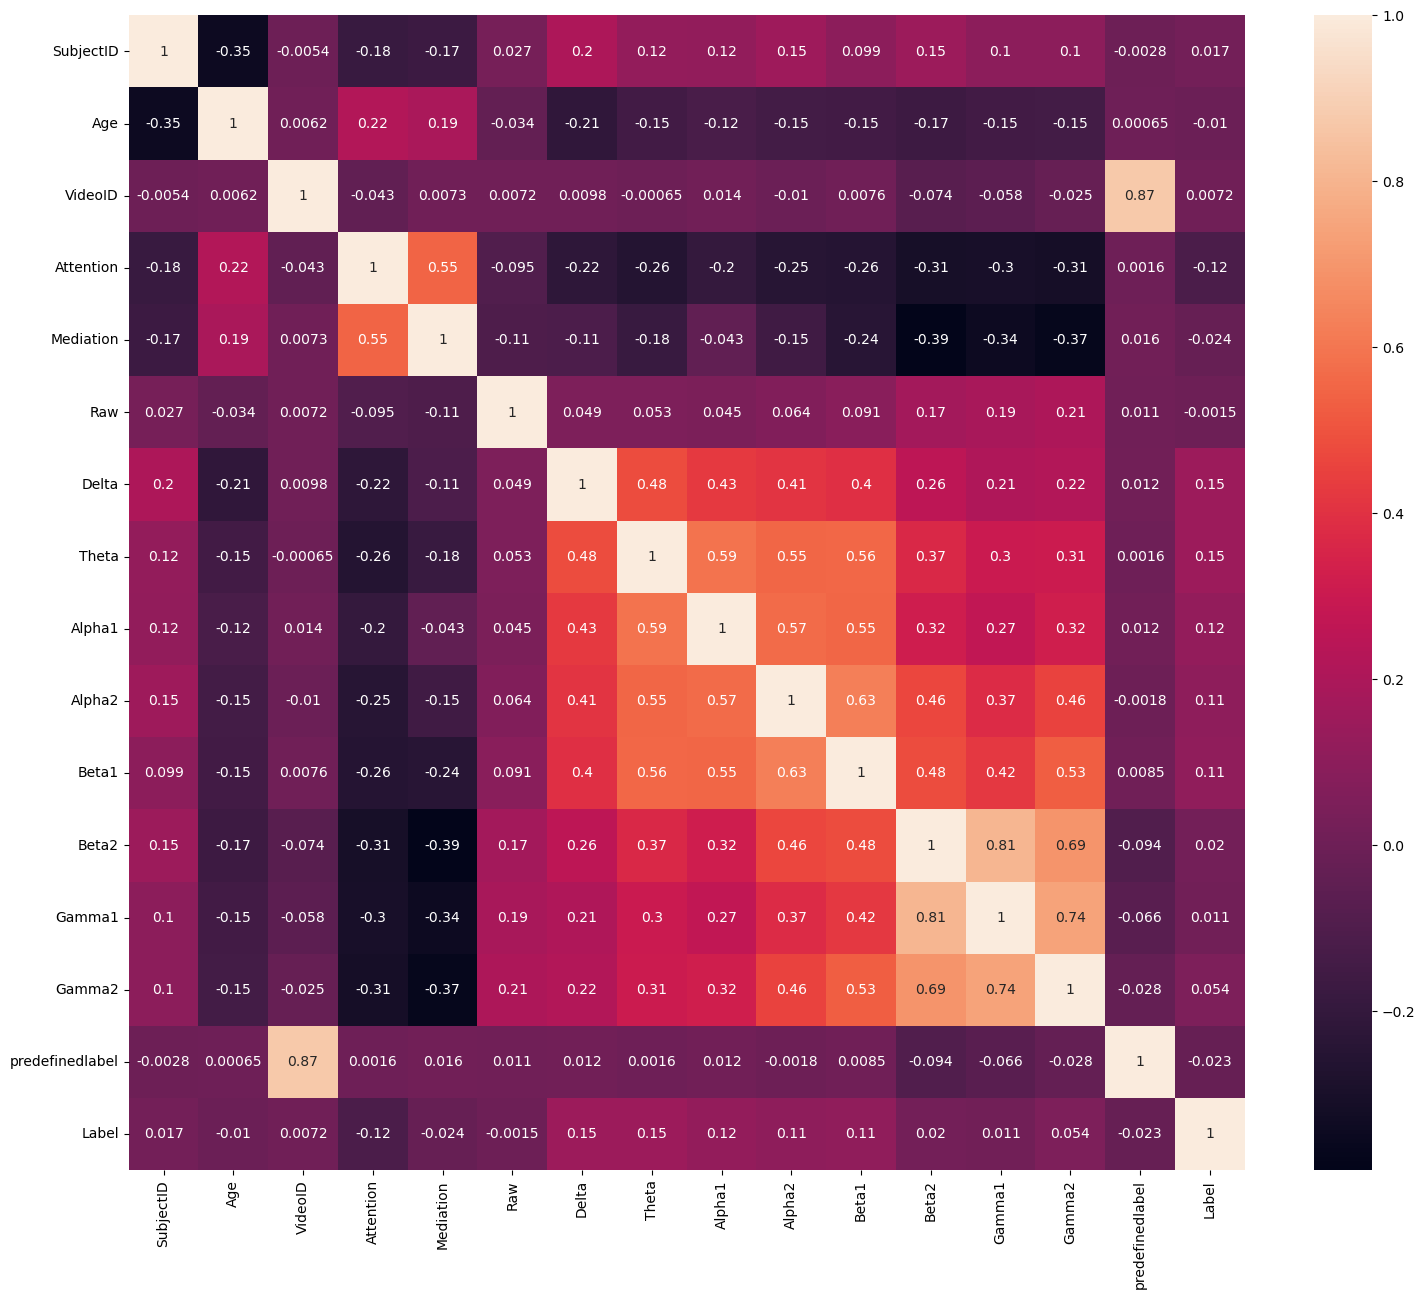

In [39]:
corr = df.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr,annot=True)
plt.show()

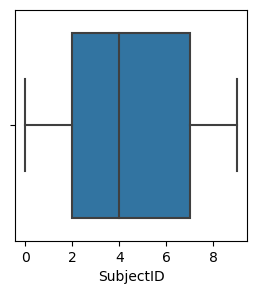

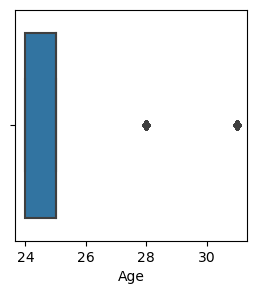

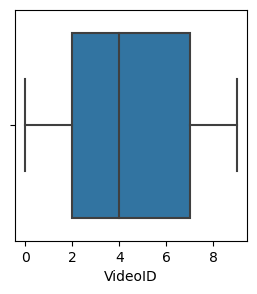

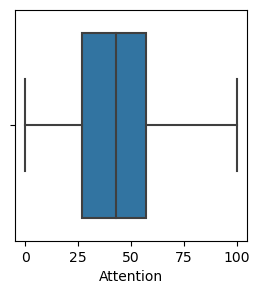

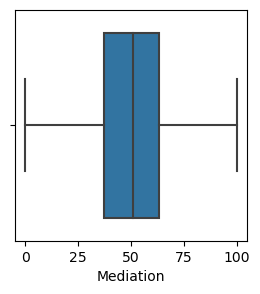

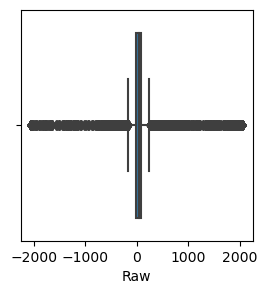

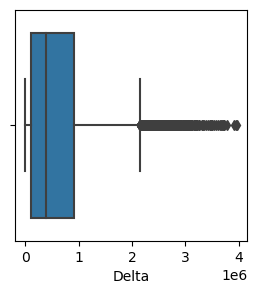

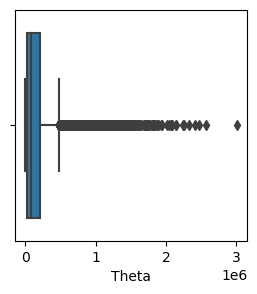

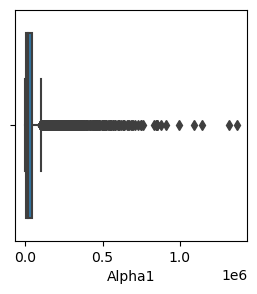

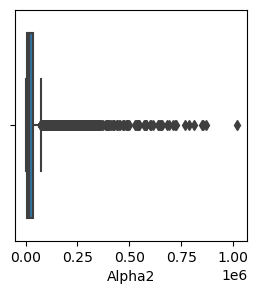

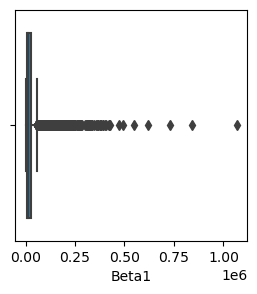

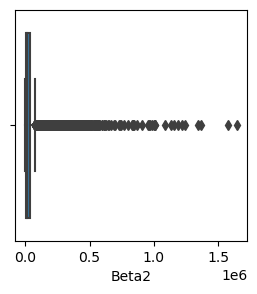

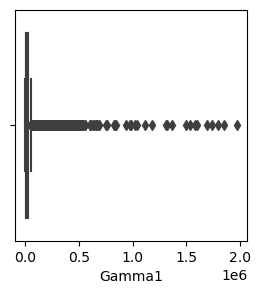

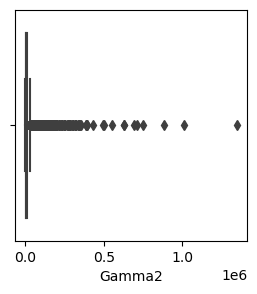

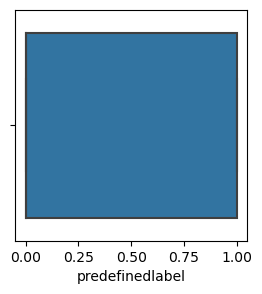

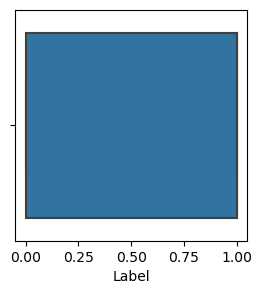

In [40]:
for col in df.select_dtypes("number").columns:
    plt.figure(figsize = (3,3))
    sns.boxplot(df[col])
    plt.show()

In [41]:
for col in df.select_dtypes("number").columns:
    Q1 = np.quantile(df[col], .25)
    Q3 = np.quantile(df[col], .75)
    IQR = Q3 - Q1
    Upper = Q3 + (1.5 * IQR)
    Lower = Q1 - (1.5 * IQR)
    
    Upper_outliers = df[df[col] > Upper][col].values
    df[col].replace(Upper_outliers, Upper, inplace = True)
    Lower_outliers = df[df[col] < Lower][col].values
    df[col].replace(Lower_outliers, Lower,inplace = True)

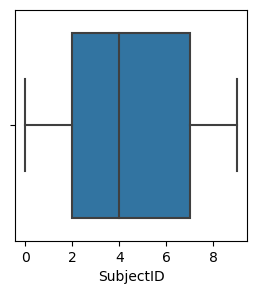

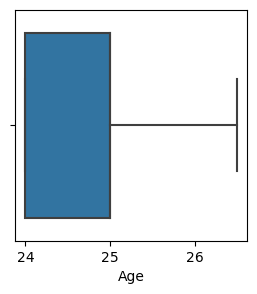

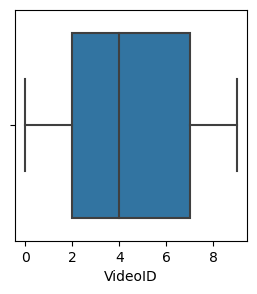

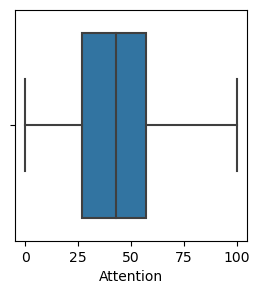

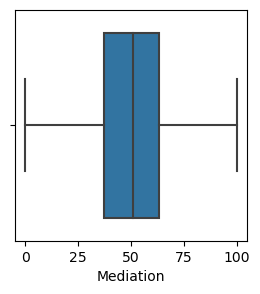

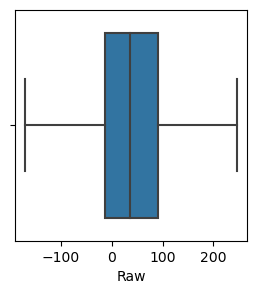

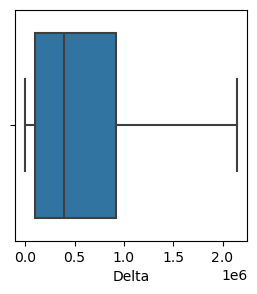

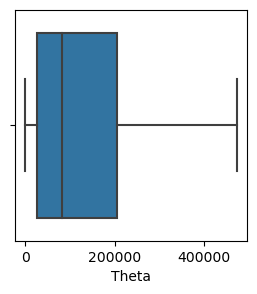

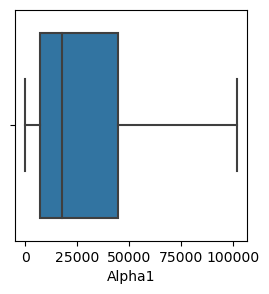

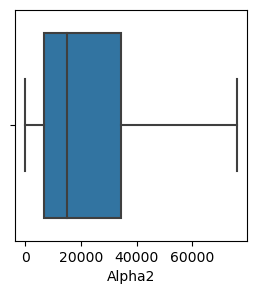

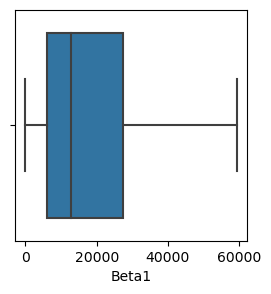

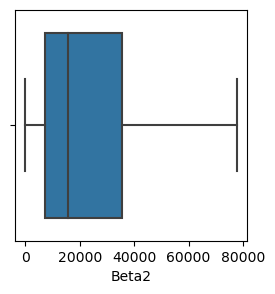

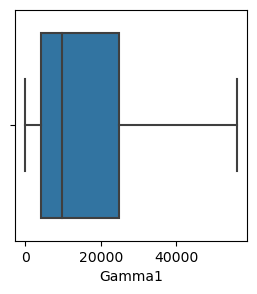

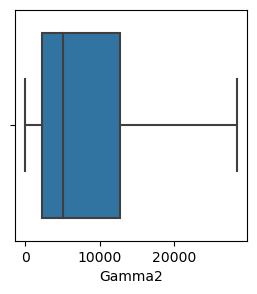

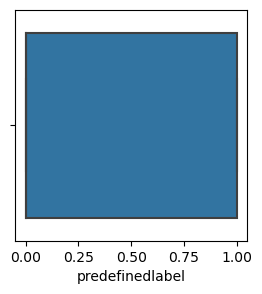

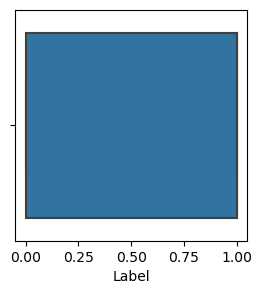

In [42]:
for col in df.select_dtypes("number").columns:
    fig, axes = plt.subplots(1, 1, figsize = (3,3))
    sns.boxplot(df[col])
    plt.show()

In [43]:
pd.DataFrame(df.columns.tolist())

,0
0,SubjectID
1,Age
2,Ethnicity
3,Gender
4,VideoID
5,Attention
6,Mediation
7,Raw
8,Delta
9,Theta


In [44]:
df

,SubjectID,Age,Ethnicity,Gender,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,Label
0,0,25.0,Han Chinese,M,0.0,56.0,43.0,246.0,301963.0,90612.00,33735.00,23991.00,27946.0,45097.00,33228.0,8293.0,0.0,0.0
1,0,25.0,Han Chinese,M,0.0,40.0,35.0,-50.0,73787.0,28083.00,1439.00,2240.00,2746.0,3687.00,5293.0,2740.0,0.0,0.0
2,0,25.0,Han Chinese,M,0.0,47.0,48.0,101.0,758353.0,383745.00,101691.75,62107.00,36293.0,77697.25,56133.0,25354.0,0.0,0.0
3,0,25.0,Han Chinese,M,0.0,47.0,57.0,-5.0,2012240.0,129350.00,61236.00,17084.00,11488.0,62462.00,49960.0,28422.5,0.0,0.0
4,0,25.0,Han Chinese,M,0.0,44.0,53.0,-8.0,1005145.0,354328.00,37102.00,76098.25,45307.0,77697.25,44790.0,28422.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9,24.0,Han Chinese,F,9.0,64.0,38.0,-39.0,127574.0,9951.00,709.00,21732.00,3872.0,39728.00,2598.0,960.0,1.0,0.0
12807,9,24.0,Han Chinese,F,9.0,61.0,35.0,-170.0,323061.0,472813.75,101691.75,76098.25,39829.0,77697.25,36574.0,10010.0,1.0,0.0
12808,9,24.0,Han Chinese,F,9.0,60.0,29.0,-170.0,680989.0,154296.00,40068.00,39122.00,10966.0,26975.00,20427.0,2024.0,1.0,0.0
12809,9,24.0,Han Chinese,F,9.0,60.0,29.0,-84.0,366269.0,27346.00,11444.00,9932.00,1939.0,3283.00,12323.0,1764.0,1.0,0.0


In [49]:
target_column = 'Gender'  

label_encoder = LabelEncoder()

df[target_column] = label_encoder.fit_transform(df[target_column])

In [51]:
target_column = 'Ethnicity'  

label_encoder = LabelEncoder()

df[target_column] = label_encoder.fit_transform(df[target_column])

In [52]:
# Separate features (X) and labels (y)
X = df.drop('Label', axis=1)  # Adjust column name based on your dataset
y = df['Theta']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
# Principal Component Analysis (PCA):reduce the dimensionality of the data
num_components = 10 # number of features after reduction
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

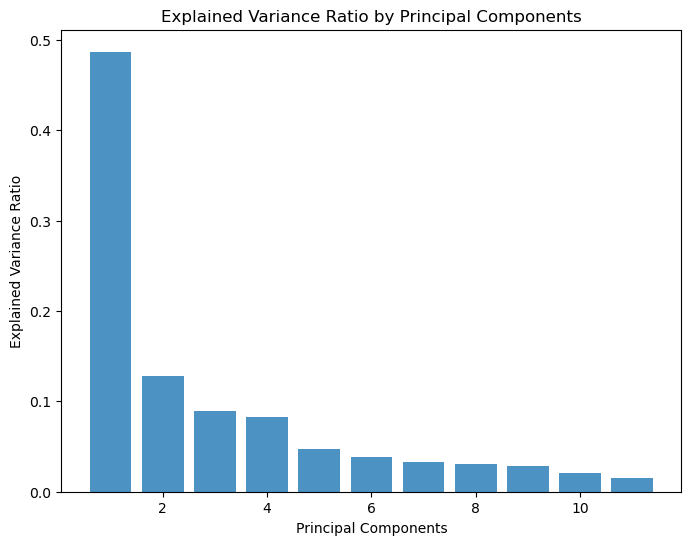

Final DataFrame with Principal Components:
   SubjectID   Age  Ethnicity  Gender  VideoID  Attention  Mediation    Raw  \
0          0  25.0          2       1      0.0       56.0       43.0  246.0   
1          0  25.0          2       1      0.0       40.0       35.0  -50.0   
2          0  25.0          2       1      0.0       47.0       48.0  101.0   
3          0  25.0          2       1      0.0       47.0       57.0   -5.0   
4          0  25.0          2       1      0.0       44.0       53.0   -8.0   

       Delta     Theta  ...  Label       PC1       PC2       PC3       PC4  \
0   301963.0   90612.0  ...    0.0  0.517997  0.463807 -1.876179  1.088667   
1    73787.0   28083.0  ...    0.0 -2.201937  0.935726  0.931810 -0.225340   
2   758353.0  383745.0  ...    0.0  4.394703 -0.820988 -0.571076  1.385647   
3  2012240.0  129350.0  ...    0.0  2.470336 -0.544285  0.417646  1.461585   
4  1005145.0  354328.0  ...    0.0  4.013111 -0.710718  0.419174  1.540735   

        PC5  

In [54]:
# Extract EEG signal columns for PCA
eeg_signals = df[['Attention', 'Mediation', 'Raw', 'Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2']]

# Standardize the data (important for PCA)
scaler = StandardScaler()
eeg_signals_standardized = scaler.fit_transform(eeg_signals)

# Apply PCA
pca = PCA()
eeg_pca_result = pca.fit_transform(eeg_signals_standardized)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

# Select the number of principal components based on the plot or a desired explained variance threshold
# For example, if you want to retain 95% of the variance
cumulative_variance_ratio = explained_variance_ratio.cumsum()
num_components = next(i for i, ratio in enumerate(cumulative_variance_ratio, 1) if ratio >= 0.95)

# Retain the selected number of principal components
eeg_pca_result_selected = eeg_pca_result[:, :num_components]

# Create a DataFrame with the principal components
eeg_pca_df = pd.DataFrame(data=eeg_pca_result_selected, columns=[f'PC{i}' for i in range(1, num_components + 1)])

# Concatenate the principal components DataFrame with the original DataFrame
final_df = pd.concat([df, eeg_pca_df], axis=1)

# Display the final DataFrame with principal components
print("Final DataFrame with Principal Components:")
print(final_df.head())

In [55]:
X = df.drop(['Label', 'predefinedlabel'], axis=1)  # Features
y = df['Label']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.58

Classification Report:
              precision    recall  f1-score   support

         0.0       0.58      0.58      0.58      1298
         1.0       0.57      0.58      0.57      1265

    accuracy                           0.58      2563
   macro avg       0.58      0.58      0.58      2563
weighted avg       0.58      0.58      0.58      2563



In [56]:
#Naive Bayesian
target_column = 'Label'  

label_encoder = LabelEncoder()

df[target_column] = label_encoder.fit_transform(df[target_column])

features_columns = ['Alpha1', 'Beta1', 'Gamma1']

X = df[features_columns]
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=22)

model = CategoricalNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_labels = label_encoder.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.54

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.25      0.35      1261
           1       0.53      0.81      0.64      1302

    accuracy                           0.54      2563
   macro avg       0.55      0.53      0.50      2563
weighted avg       0.55      0.54      0.50      2563



In [57]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)
print("F-measure:", f1)

Confusion Matrix:
[[ 321  940]
 [ 245 1057]]

Accuracy: 0.537651190011705
Error Rate: 0.462348809988295
Precision: 0.5292939409113671
Recall: 0.8118279569892473
F-measure: 0.6408002424977266


In [58]:
model = DecisionTreeClassifier(random_state=20)

In [59]:
#Decision Tree (Entropy, and error estimation)
# Assuming X is your feature matrix and y is your target variable

X = df[['Attention']]  # Assuming 'Attention' is your feature
y = df['Label']        # Assuming 'Label' is your target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

# Create a decision tree classifier with entropy as the criterion
tree_classifier = DecisionTreeClassifier(criterion='entropy', random_state=46)

# Train the decision tree on the training data
tree_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = tree_classifier.predict(X_test)

# Calculate accuracy on the testing set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5879828326180258


In [60]:
#K-NN
# Assuming X is your feature matrix and y is your target variable
# Replace 'features' and 'labels' with your actual feature and target variable names
X = df[['Age', 'Attention', 'Mediation', 'Raw', 'Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2']]  
y = df['Label']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68)

# Create K-NN classifiers with different distance metrics
knn_euclidean = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_minkowski = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)  # p=2 for Euclidean
knn_chebyshev = KNeighborsClassifier(n_neighbors=3, metric='chebyshev')

# Train the classifiers
knn_euclidean.fit(X_train, y_train)
knn_manhattan.fit(X_train, y_train)
knn_minkowski.fit(X_train, y_train)
knn_chebyshev.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_euclidean = knn_euclidean.predict(X_test)
y_pred_manhattan = knn_manhattan.predict(X_test)
y_pred_minkowski = knn_minkowski.predict(X_test)
y_pred_chebyshev = knn_chebyshev.predict(X_test)

# Calculate accuracy for each classifier
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
accuracy_minkowski = accuracy_score(y_test, y_pred_minkowski)
accuracy_chebyshev = accuracy_score(y_test, y_pred_chebyshev)

print(f"Accuracy (Euclidean): {accuracy_euclidean}")
print(f"Accuracy (Manhattan): {accuracy_manhattan}")
print(f"Accuracy (Minkowski): {accuracy_minkowski}")
print(f"Accuracy (Chebyshev): {accuracy_chebyshev}")


Accuracy (Euclidean): 0.5602809207959423
Accuracy (Manhattan): 0.5645727662895045
Accuracy (Minkowski): 0.5602809207959423
Accuracy (Chebyshev): 0.556379243074522


In [61]:
#K-fold cross validation and avarage accuracy
# Create a K-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3, metric='manhattan')

# Specify the number of folds for cross-validation
k_folds = 5  # You can adjust this number based on your preferences

# Perform K-Fold Cross-Validation
cv = KFold(n_splits=k_folds, shuffle=True, random_state=22)

# Get accuracy scores for each fold
accuracy_scores = cross_val_score(knn_classifier, X, y, cv=cv, scoring='accuracy')

# Calculate the average accuracy
average_accuracy = np.mean(accuracy_scores)

# Print the results
print(f"Accuracy Scores for Each Fold: {accuracy_scores}")
print(f"Average Accuracy: {average_accuracy}")

Accuracy Scores for Each Fold: [0.55520874 0.55542545 0.56206089 0.56479313 0.57884465]
Average Accuracy: 0.563266572307591


In [62]:
scaler = LabelEncoder()

scaler.fit_transform(df.Label)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
# Assuming X and y are your feature matrix and target variable
X = df[['Attention']]  
y = df['Label']        

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the training set
train_preds = model.predict(X_train)
# Make predictions on the testing set
test_preds = model.predict(X_test)

# Evaluate performance metrics
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

train_precision = precision_score(y_train, train_preds)
test_precision = precision_score(y_test, test_preds)

train_recall = recall_score(y_train, train_preds)
test_recall = recall_score(y_test, test_preds)

train_f1 = f1_score(y_train, train_preds)
test_f1 = f1_score(y_test, test_preds)

print("Training Set Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")

print("\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")

Training Set Metrics:
Accuracy: 0.5852849336455894
Precision: 0.5995081346954219
Recall: 0.5976989815164089
F1 Score: 0.5986021911598035

Test Set Metrics:
Accuracy: 0.5801794771751854
Precision: 0.574468085106383
Recall: 0.5762845849802372
F1 Score: 0.5753749013417522


In [64]:
# Assuming 'Label' is the target variable and other columns are features
X = df.drop(['Label'], axis=1)
y = df['Label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Interpretation
tn, fp, fn, tp = conf_matrix.ravel()

# Precision
precision = tp / (tp + fp)
print(f'Precision: {precision:.2f}')

# Recall (Sensitivity)
recall = tp / (tp + fn)
print(f'Recall (Sensitivity): {recall:.2f}')

# Specificity
specificity = tn / (tn + fp)
print(f'Specificity: {specificity:.2f}')

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'F1 Score: {f1_score:.2f}')

# Analyze overfitting or underfitting based on training vs. test accuracy
train_accuracy = nb_classifier.score(X_train, y_train)
print(f'Training Accuracy: {train_accuracy:.2f}')

# Compare training and test accuracies
if train_accuracy > accuracy:
    print("The model might be overfitting.")
elif train_accuracy < accuracy:
    print("The model might be underfitting.")
else:
    print("The model seems to be appropriately fitting the data.")


Confusion Matrix:
[[934 364]
 [719 546]]
Accuracy: 0.58

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.72      0.63      1298
           1       0.60      0.43      0.50      1265

    accuracy                           0.58      2563
   macro avg       0.58      0.58      0.57      2563
weighted avg       0.58      0.58      0.57      2563

Precision: 0.60
Recall (Sensitivity): 0.43
Specificity: 0.72
F1 Score: 0.50
Training Accuracy: 0.56
The model might be underfitting.


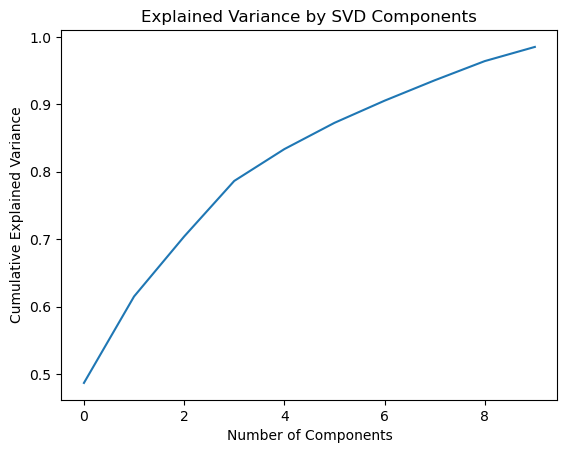

Cross-validated Accuracy: 0.53


In [80]:
#Singular Value Decomposition (SVD)
# Extract relevant EEG features
# Assuming EEG features start from the 7th column (Raw onwards)
eeg_features = df.iloc[:, 7:-2]  # Exclude non-EEG columns

# Standardize the EEG data
scaler = StandardScaler()
eeg_scaled = scaler.fit_transform(eeg_features)

# Apply Singular Value Decomposition (SVD)
n_components = 10  # Choose the number of components to retain
svd = TruncatedSVD(n_components=n_components)
eeg_svd = svd.fit_transform(eeg_signals_standardized)


# Plot the explained variance ratio
explained_variance_ratio = svd.explained_variance_ratio_
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by SVD Components')
plt.show()

# Choose the desired number of components based on the plot
chosen_components = 5  # Adjust as needed

# Apply SVD with the chosen number of components
svd = TruncatedSVD(n_components=chosen_components)
eeg_svd = svd.fit_transform(eeg_scaled)

# Add the SVD components to the DataFrame
eeg_svd_df = pd.DataFrame(eeg_svd, columns=[f'SVD_{i+1}' for i in range(chosen_components)])
final_data = pd.concat([df, eeg_svd_df], axis=1)

labels = final_data['predefinedlabel']
scores = cross_val_score(model, eeg_svd, labels, cv=5)  # Adjust 'model' and 'labels' accordingly
print(f'Cross-validated Accuracy: {np.mean(scores):.2f}')

In [82]:
#neural network
# Extract relevant features and labels
X = df.iloc[:, -chosen_components:]  # Using SVD components as features
y = df['predefinedlabel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a neural network classifier
# You may need to adjust parameters based on your specific requirements
mlp_classifier = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)

# Train the model
mlp_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = mlp_classifier.predict(X_test_scaled)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)




print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Cross-validated Accuracy: 1.00
Accuracy: 1.00

Confusion Matrix:
[[1326    0]
 [   0 1237]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1326
         1.0       1.00      1.00      1.00      1237

    accuracy                           1.00      2563
   macro avg       1.00      1.00      1.00      2563
weighted avg       1.00      1.00      1.00      2563



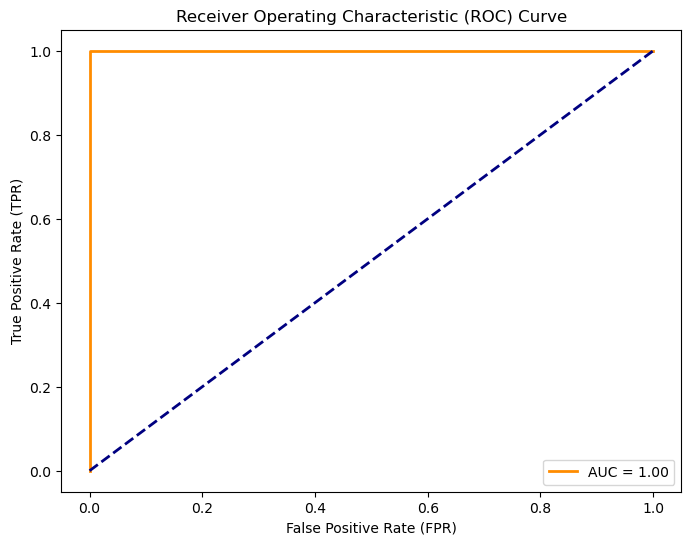

In [73]:
#Receiver Operating Characteristic (ROC)
# Extract relevant features and labels
X = df.iloc[:, -chosen_components:]  # Using SVD components as features
y = df['predefinedlabel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a neural network classifier
# You may need to adjust parameters based on your specific requirements
mlp_classifier = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)

# Train the model
mlp_classifier.fit(X_train_scaled, y_train)

# Obtain predicted probabilities for positive class
y_probs = mlp_classifier.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()